# ANÁLISIS DE DATOS - HISTÓRICO COMANDAS 

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

In [18]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# IMPORTACIÓN DE DATOS POR EXCEL

In [19]:
df = pd.read_excel('./historico-comandas-completo.xls', sheet_name=1)

In [20]:
df.head()

,ID_COMANDA,NRO_MESA,ESTADO,ESTADO_STK,APERTURA,H_AP_REAL,PUESTO_CIE,DESC_P_CIE,CIERRE,HORA_CIERR,...,FECHA_FAC,HORA_FAC,BONIF_FAC,BONIF_CLI,USUARIO,FECHA_ANU,HORA_ANU,MOTIVO,AUTORIZA,SUCURSAL
0,26,22,Facturada,Remitido,2023-01-02 10:06:00,10:06,1,CAJA,02/01/202310:08,10:08,...,2023-01-02,10:08,0.00,0.00,,NaT,,,,1
1,27,34,Cobrada,Remitido,2023-01-03 18:31:00,18:31,1,CAJA,03/01/202318:33,18:33,...,2023-01-03,18:33,0.00,,,NaT,,,,1
2,28,25,Cobrada,Remitido,2023-01-03 18:36:00,18:36,1,CAJA,04/01/202311:07,11:07,...,2023-01-04,11:07,0.00,,,NaT,,,,1
3,29,16,Cobrada,Remitido,2023-01-04 11:13:00,11:13,1,CAJA,04/01/202311:13,11:13,...,2023-01-04,11:13,0.00,,,NaT,,,,1
4,30,16,Cobrada,Remitido,2023-01-04 11:17:00,11:17,1,CAJA,04/01/202311:18,11:18,...,2023-01-04,11:18,0.00,,,NaT,,,,1


# INFO DF

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13922 entries, 0 to 13921
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID_COMANDA  13922 non-null  int64         
 1   NRO_MESA    13922 non-null  int64         
 2   ESTADO      13922 non-null  object        
 3   ESTADO_STK  13922 non-null  object        
 4   APERTURA    13922 non-null  datetime64[ns]
 5   H_AP_REAL   13922 non-null  object        
 6   PUESTO_CIE  13922 non-null  int64         
 7   DESC_P_CIE  13922 non-null  object        
 8   CIERRE      13922 non-null  object        
 9   HORA_CIERR  13922 non-null  object        
 10  FECHA_REAL  13922 non-null  datetime64[ns]
 11  DIA_REAL    13922 non-null  int64         
 12  DIA_S_REAL  13922 non-null  object        
 13  FECHA       13922 non-null  datetime64[ns]
 14  DIA         13922 non-null  int64         
 15  DIA_SEMA    13922 non-null  object        
 16  COD_HORARI  13922 non-

In [22]:
estados = df['ESTADO'].unique()
print(estados)

['Facturada       ' 'Cobrada         ' 'Anulada         '
 'En Cta.Cte.     ']


In [23]:
# Filtrar el DataFrame donde la columna 'ESTADO' sea igual a 'COBRADA'
df = df[df['ESTADO'] != 'Anulada         ']

In [24]:
df['CIERRE'] = df['CIERRE'].str.strip()


# Convertir las columnas de fecha y hora en datetime
df['FECHA_REAL'] = pd.to_datetime(df['FECHA_REAL'], format='%d/%m/%Y', errors='coerce')
df['H_AP_REAL'] = pd.to_datetime(df['H_AP_REAL'], format='%H:%M', errors='coerce').dt.time
df['CIERRE'] = pd.to_datetime(df['CIERRE'], format='%d/%m/%Y%H:%M', errors='coerce')
df['FECHA_FAC'] = pd.to_datetime(df['FECHA_FAC'], format='%d/%m/%Y', errors='coerce')
df['HORA_FAC'] = pd.to_datetime(df['HORA_FAC'], format='%H:%M', errors='coerce').dt.time

# Crear las columnas TIEMPO_1, TIEMPO_2 y TIEMPO_3
df['TIEMPO_1'] = df.apply(lambda row: row['FECHA_REAL'] + pd.to_timedelta(str(row['H_AP_REAL'])), axis=1)
df['TIEMPO_2'] = df['CIERRE']
df['TIEMPO_3'] = df.apply(lambda row: row['FECHA_FAC'] + pd.to_timedelta(str(row['HORA_FAC'])), axis=1)


# Calcular las diferencias de tiempo
df['PERM_1'] = df['TIEMPO_2'] - df['TIEMPO_1']
df['PERM_2'] = df['TIEMPO_3'] - df['TIEMPO_2']


df = df.dropna(subset=['CIERRE'])

In [25]:
df['PERM_1'] = df['PERM_1'].dt.total_seconds() / 60
df['PERM_2'] = df['PERM_2'].dt.total_seconds() / 60

In [26]:
df.dtypes

ID_COMANDA             int64
NRO_MESA               int64
ESTADO                object
ESTADO_STK            object
APERTURA      datetime64[ns]
                   ...      
TIEMPO_1      datetime64[ns]
TIEMPO_2      datetime64[ns]
TIEMPO_3      datetime64[ns]
PERM_1               float64
PERM_2               float64
Length: 68, dtype: object

# VISUALIZACIÓN COLUMNAS DE TIEMPOS Y PERMANENCIA

In [27]:
df[['ID_COMANDA','TIEMPO_1','TIEMPO_2','TIEMPO_3','PERM_1','PERM_2']].head(20)

,ID_COMANDA,TIEMPO_1,TIEMPO_2,TIEMPO_3,PERM_1,PERM_2
0,26,2023-01-02 10:06:00,2023-01-02 10:08:00,2023-01-02 10:08:00,2.0,0.0
1,27,2023-01-03 18:31:00,2023-01-03 18:33:00,2023-01-03 18:33:00,2.0,0.0
2,28,2023-01-03 18:36:00,2023-01-04 11:07:00,2023-01-04 11:07:00,991.0,0.0
3,29,2023-01-04 11:13:00,2023-01-04 11:13:00,2023-01-04 11:13:00,0.0,0.0
4,30,2023-01-04 11:17:00,2023-01-04 11:18:00,2023-01-04 11:18:00,1.0,0.0
5,31,2023-01-04 11:20:00,2023-01-04 11:29:00,2023-01-04 11:31:00,9.0,2.0
6,32,2023-01-04 11:22:00,2023-01-04 11:24:00,2023-01-04 11:26:00,2.0,2.0
7,33,2023-01-04 11:31:00,2023-01-04 11:32:00,2023-01-04 11:34:00,1.0,2.0
8,34,2023-01-04 11:33:00,2023-01-04 11:33:00,2023-01-04 11:34:00,0.0,1.0
9,35,2023-01-04 11:38:00,2023-01-04 11:38:00,2023-01-04 11:38:00,0.0,0.0


# BORRAR LOS OUTLIERS

### FILTRAMOS POR TIEMPOS PERM_1 > 30 min 
Los que son menores a 30 min, pueden ser pruebas del software o equivocaciones que van a afectar a nuestro análisis

In [28]:
# Filtrar outliers
filtered_df0 = df[df['PERM_1'] > 30]

### BORRAMOS LOS OUTLIERS DE LA COLUMNA PERM_1

In [29]:
# Calcular el rango intercuartil (IQR)
Q1 = filtered_df0['PERM_1'].quantile(0.25)
Q3 = filtered_df0['PERM_1'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Filtrar outliers
filtered_df1 = filtered_df0[(filtered_df0['PERM_1'] >= lower_bound) & (filtered_df0['PERM_1'] <= upper_bound)]

### BORRAMOS LOS OUTLIERS DE LA COLUMNA PERM_2

In [30]:
# Calcular el rango intercuartil (IQR)
Q1 = filtered_df1['PERM_2'].quantile(0.25)
Q3 = filtered_df1['PERM_2'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Filtrar outliers
filtered_df2 = filtered_df1[(filtered_df1['PERM_2'] >= lower_bound) & (filtered_df1['PERM_2'] <= upper_bound)]

### BORRAMOS LOS OUTLIERS DE LA COLUMNA TOTAL

In [31]:
promedio_total = filtered_df2['TOTAL'].mean()
print(promedio_total)

7121.911644201968


In [32]:
# Calcular el rango intercuartil (IQR)
Q1 = filtered_df2['TOTAL'].quantile(0.25)
Q3 = filtered_df2['TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 10 * IQR

# Filtrar outliers
filtered_df = filtered_df2[(filtered_df2['TOTAL'] >= lower_bound) & (filtered_df2['TOTAL'] <= upper_bound)]

In [33]:
promedio_total = filtered_df['TOTAL'].mean()
print(promedio_total)

6983.927773014682


In [34]:
filtered_df['PERM_TOTAL'] = df['PERM_1'] + df['PERM_2']

C:\Users\User\AppData\Local\Temp\ipykernel_11620\2837751354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PERM_TOTAL'] = df['PERM_1'] + df['PERM_2']


In [35]:
filtered_df[['ID_COMANDA','TIEMPO_1','TIEMPO_2','TIEMPO_3','PERM_TOTAL','PERM_1','PERM_2']].head(20)

,ID_COMANDA,TIEMPO_1,TIEMPO_2,TIEMPO_3,PERM_TOTAL,PERM_1,PERM_2
58,84,2023-01-05 12:20:00,2023-01-05 13:18:00,2023-01-05 14:08:00,108.0,58.0,50.0
59,85,2023-01-05 12:20:00,2023-01-05 13:37:00,2023-01-05 14:08:00,108.0,77.0,31.0
79,105,2023-01-05 12:51:00,2023-01-05 13:52:00,2023-01-05 13:59:00,68.0,61.0,7.0
81,107,2023-01-05 12:57:00,2023-01-05 13:54:00,2023-01-05 13:56:00,59.0,57.0,2.0
83,109,2023-01-05 13:28:00,2023-01-05 14:07:00,2023-01-05 14:09:00,41.0,39.0,2.0
96,122,2023-01-05 18:59:00,2023-01-05 19:47:00,2023-01-05 19:50:00,51.0,48.0,3.0
99,125,2023-01-05 21:05:00,2023-01-05 23:07:00,2023-01-05 23:45:00,160.0,122.0,38.0
104,130,2023-01-05 21:18:00,2023-01-05 22:25:00,2023-01-05 22:47:00,89.0,67.0,22.0
109,135,2023-01-05 21:30:00,2023-01-05 22:20:00,2023-01-05 22:53:00,83.0,50.0,33.0
124,150,2023-01-05 22:46:00,2023-01-06 00:54:00,2023-01-06 01:39:00,173.0,128.0,45.0


In [36]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9331 entries, 58 to 13920
Data columns (total 69 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID_COMANDA  9331 non-null   int64         
 1   NRO_MESA    9331 non-null   int64         
 2   ESTADO      9331 non-null   object        
 3   ESTADO_STK  9331 non-null   object        
 4   APERTURA    9331 non-null   datetime64[ns]
 5   H_AP_REAL   9331 non-null   object        
 6   PUESTO_CIE  9331 non-null   int64         
 7   DESC_P_CIE  9331 non-null   object        
 8   CIERRE      9331 non-null   datetime64[ns]
 9   HORA_CIERR  9331 non-null   object        
 10  FECHA_REAL  9331 non-null   datetime64[ns]
 11  DIA_REAL    9331 non-null   int64         
 12  DIA_S_REAL  9331 non-null   object        
 13  FECHA       9331 non-null   datetime64[ns]
 14  DIA         9331 non-null   int64         
 15  DIA_SEMA    9331 non-null   object        
 16  COD_HORARI  9331 non-n

# BOXPLOT - TIEMPOS

<AxesSubplot:ylabel='PERM_TOTAL'>

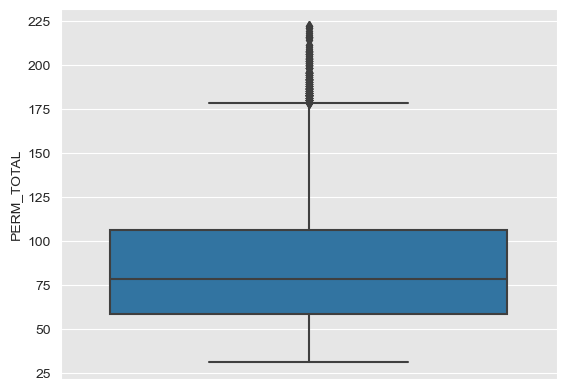

In [37]:
sns.boxplot(data=filtered_df, y="PERM_TOTAL")

<AxesSubplot:ylabel='PERM_1'>

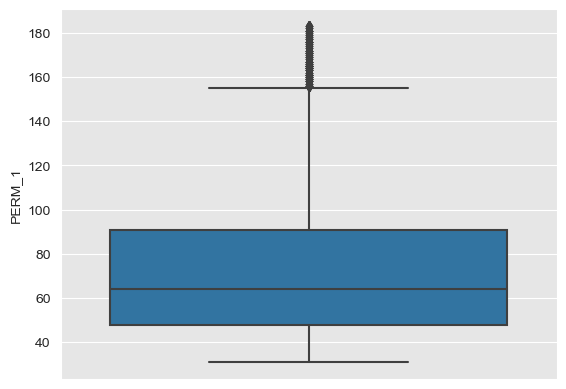

In [38]:
sns.boxplot(data=filtered_df, y="PERM_1")

<AxesSubplot:ylabel='PERM_2'>

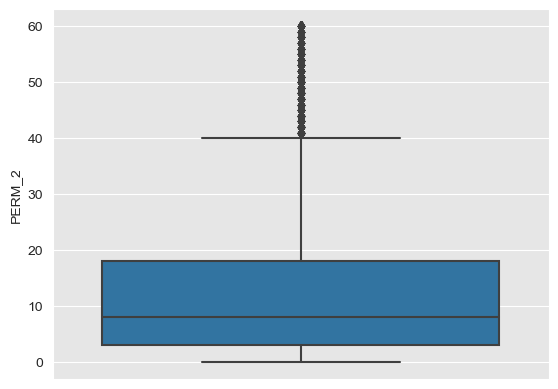

In [39]:
sns.boxplot(data=filtered_df, y="PERM_2")

# SELECCIONAR SÓLO LOS DÍAS VIERNES, SÁBADO Y DOMINGO

In [40]:
dias = filtered_df['DIA_SEMA'].unique()
print(dias)

['Jueves   ' 'Viernes  ' 'Sábado   ' 'Domingo  ' 'Lunes    ' 'Martes   '
 'Miércoles']


In [41]:
weekend_df = filtered_df[filtered_df["DIA_SEMA"].isin(["Viernes  ", "Sábado   ", "Domingo  "])]

In [42]:
total_rows = weekend_df.shape[0]
print(f"Total de filas en el DataFrame: {total_rows}")

Total de filas en el DataFrame: 4665


# FILTRAR POR TURNO NOCHE

In [43]:
# Filtrar la columna de hora apertura para que sean mayores a las 17:00 y menores a las 02:00 del día siguiente
weekend_night_df = weekend_df[(weekend_df["APERTURA"].dt.hour >= 17) | (weekend_df["APERTURA"].dt.hour < 2)]

In [44]:
total_rows = weekend_night_df.shape[0]
print(f"Total de filas en el DataFrame: {total_rows}")

Total de filas en el DataFrame: 3833


In [45]:
dias = weekend_night_df['DIA_SEMA'].unique()
print(dias)

['Viernes  ' 'Sábado   ' 'Domingo  ']


# GRÁFICOS

<AxesSubplot:xlabel='DIA_SEMA', ylabel='PERM_TOTAL'>

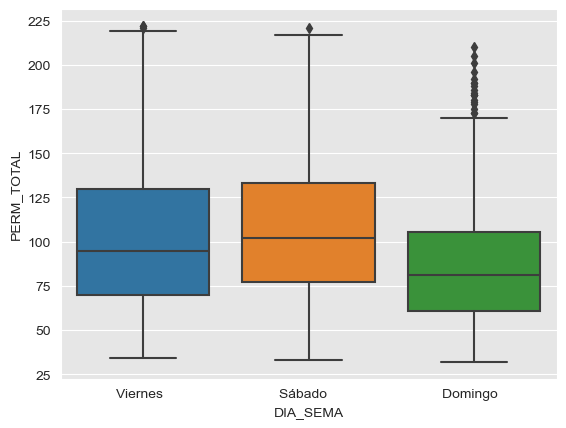

In [89]:
sns.boxplot(data=weekend_night_df,x="DIA_SEMA", y="PERM_TOTAL")

<AxesSubplot:xlabel='DIA_SEMA', ylabel='TOTAL'>

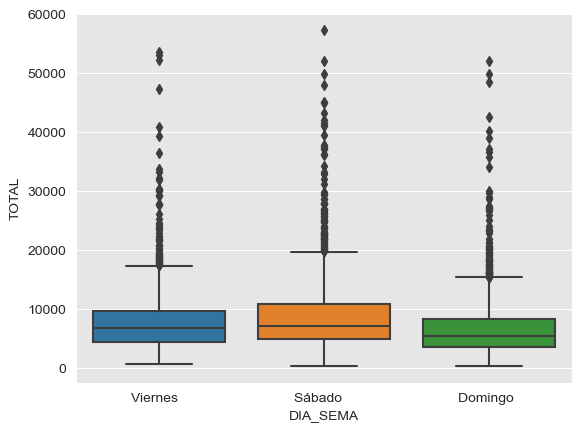

In [90]:
sns.boxplot(data=weekend_night_df,x="DIA_SEMA", y="TOTAL")

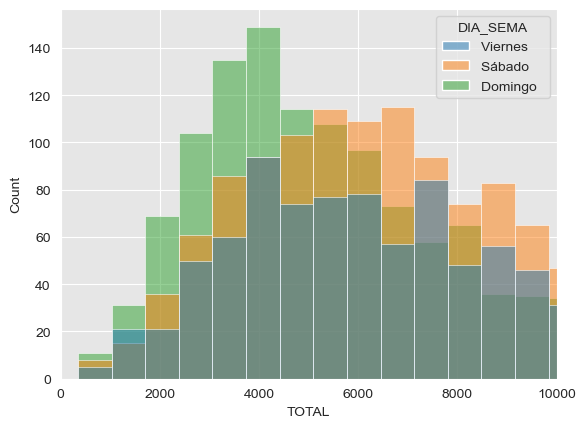

In [91]:
sns.histplot(data=weekend_night_df, x="TOTAL", hue="DIA_SEMA")
plt.xlim(0,10000)  # Define tus límites según tus necesidades
plt.show()

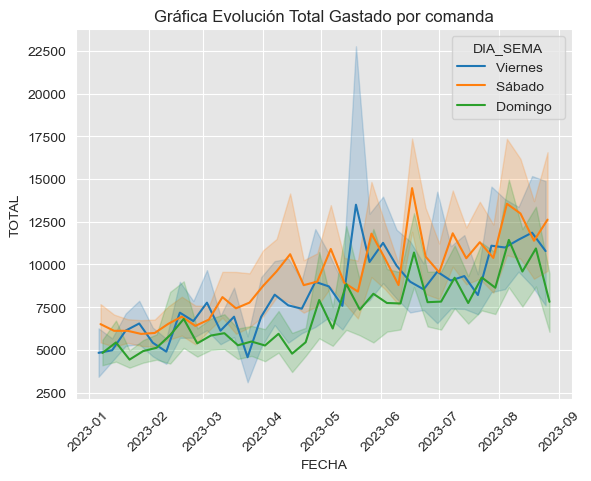

In [92]:
sns.lineplot(data=weekend_night_df,x="FECHA", y="TOTAL", hue="DIA_SEMA")
plt.xticks(rotation=45)
plt.title('Gráfica Evolución Total Gastado por comanda')
plt.show()

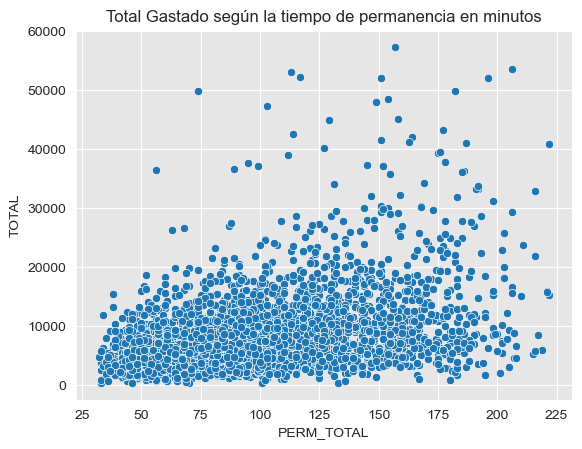

In [93]:
sns.scatterplot(data=weekend_night_df, x="PERM_TOTAL", y="TOTAL")
#plt.xticks(rotation=45)
plt.title('Total Gastado según la tiempo de permanencia en minutos')
plt.show()

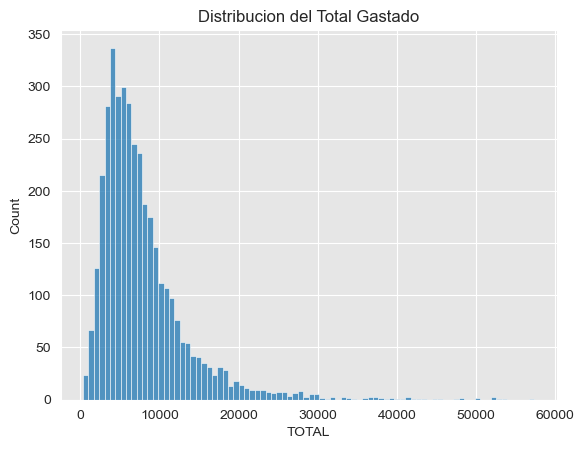

In [94]:
sns.histplot(data=weekend_night_df,x='TOTAL')
#plt.xticks(rotation=45)
plt.title('Distribucion del Total Gastado')
plt.show()

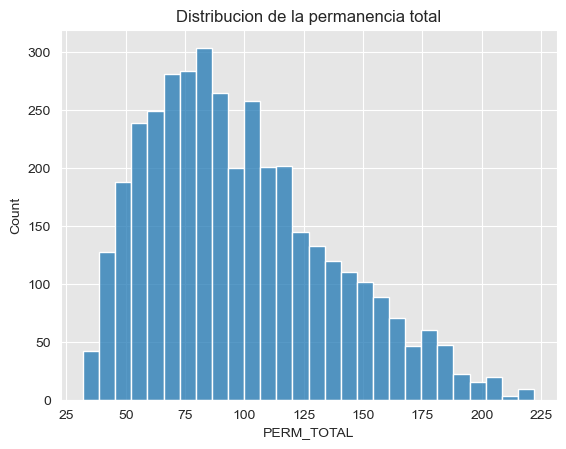

In [37]:
sns.histplot(data=weekend_night_df,x='PERM_TOTAL')
#plt.xticks(rotation=45)
plt.title('Distribucion de la permanencia total')
plt.show()

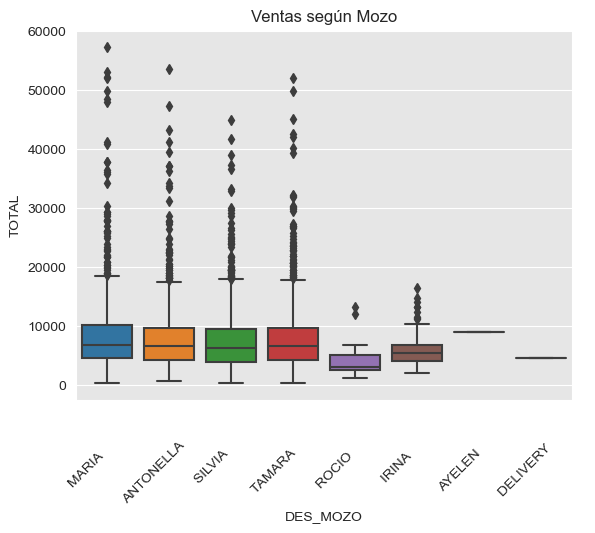

In [38]:
sns.boxplot(data=weekend_night_df, x='DES_MOZO', y='TOTAL')
plt.title('Ventas según Mozo')
#plt.ylim(bottom=0, top=80000) 
plt.xticks(rotation=45)
plt.show()

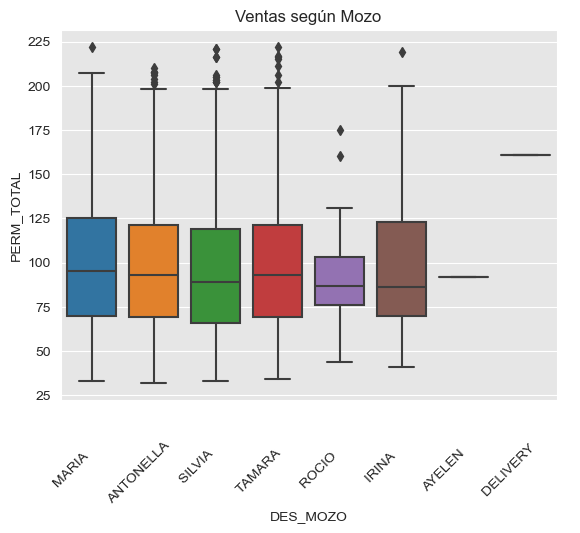

In [39]:
sns.boxplot(data=weekend_night_df, x='DES_MOZO', y='PERM_TOTAL')
plt.title('Ventas según Mozo')
#plt.ylim(bottom=0, top=80000) 
plt.xticks(rotation=45)
plt.show()

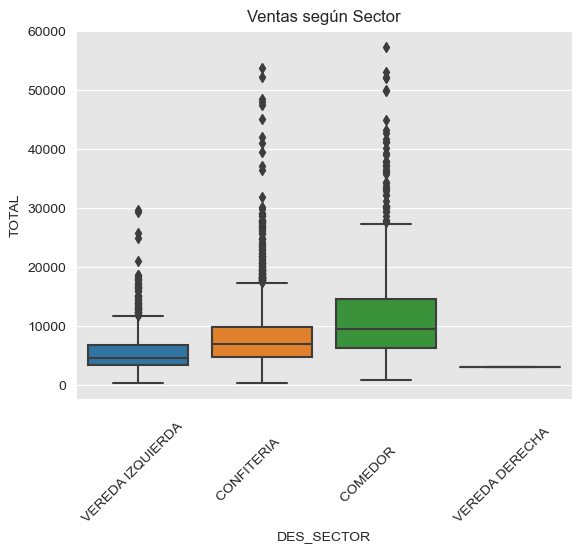

In [40]:
sns.boxplot(data=weekend_night_df, x='DES_SECTOR', y='TOTAL')
plt.title('Ventas según Sector')
plt.xticks(rotation=45)
plt.show()

# GRÁFICOS DISTRIBUCIONES

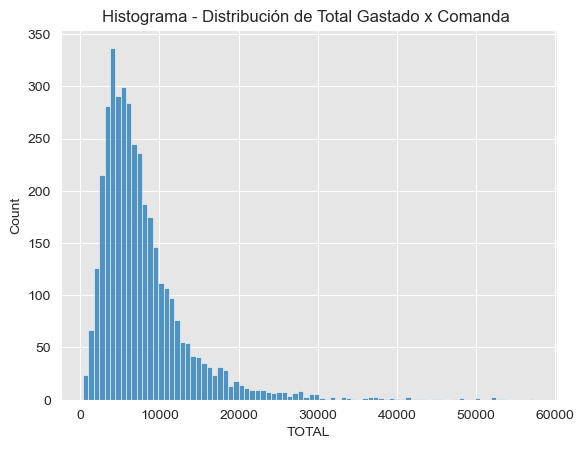

In [43]:
sns.histplot(data=weekend_night_df,x='TOTAL')
plt.title('Histograma - Distribución de Total Gastado x Comanda ')
plt.show()

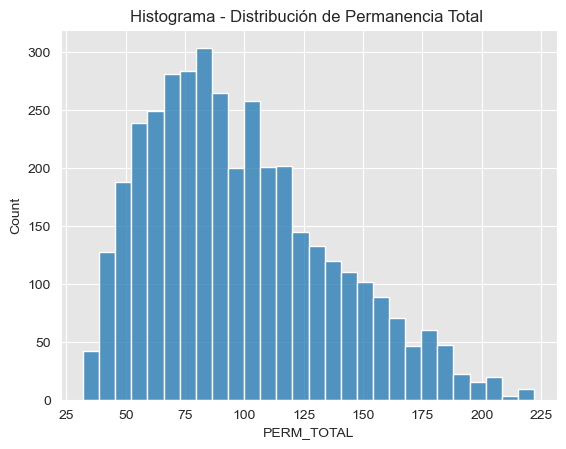

In [42]:
sns.histplot(data=weekend_night_df,x='PERM_TOTAL')
plt.title('Histograma - Distribución de Permanencia Total ')
plt.show()

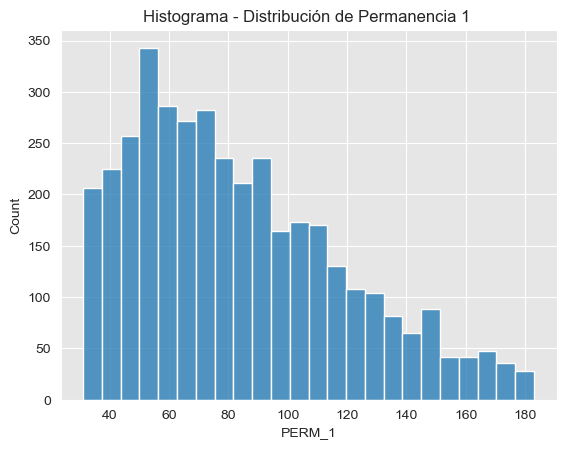

In [44]:
sns.histplot(data=weekend_night_df,x='PERM_1')
plt.title('Histograma - Distribución de Permanencia 1 ')
plt.show()

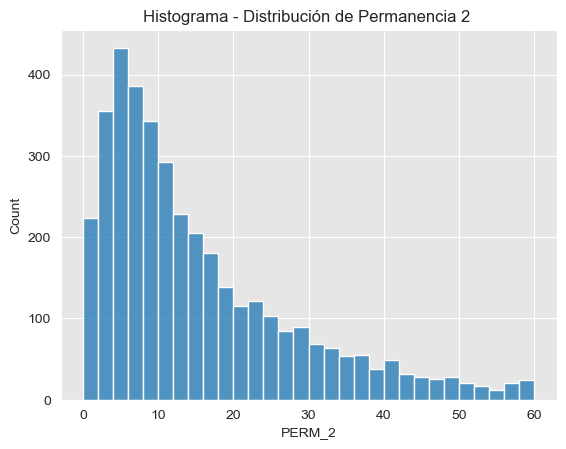

In [45]:
sns.histplot(data=weekend_night_df,x='PERM_2')
plt.title('Histograma - Distribución de Permanencia 2 ')
plt.show()

# FRANJAS HORARIAS

In [54]:
weekend_night_df.head()

,ID_COMANDA,NRO_MESA,ESTADO,ESTADO_STK,APERTURA,H_AP_REAL,PUESTO_CIE,DESC_P_CIE,CIERRE,HORA_CIERR,...,HORA_ANU,MOTIVO,AUTORIZA,SUCURSAL,TIEMPO_1,TIEMPO_2,TIEMPO_3,PERM_1,PERM_2,PERM_TOTAL
137,163,212,Cobrada,Remitido,2023-01-06 00:15:00,00:15:00,1,CAJA,2023-01-06 00:59:00,00:59,...,,,,1,2023-01-06 00:15:00,2023-01-06 00:59:00,2023-01-06 01:39:00,44.0,40.0,84.0
142,168,109,Cobrada,Remitido,2023-01-06 20:09:00,20:09:00,1,CAJA,2023-01-06 21:04:00,21:04,...,,,,1,2023-01-06 20:09:00,2023-01-06 21:04:00,2023-01-06 21:28:00,55.0,24.0,79.0
145,171,112,Cobrada,Remitido,2023-01-06 20:18:00,20:18:00,1,CAJA,2023-01-06 21:26:00,21:26,...,,,,1,2023-01-06 20:18:00,2023-01-06 21:26:00,2023-01-06 21:29:00,68.0,3.0,71.0
147,173,105,Cobrada,Remitido,2023-01-06 20:28:00,20:28:00,1,CAJA,2023-01-06 21:20:00,21:20,...,,,,1,2023-01-06 20:28:00,2023-01-06 21:20:00,2023-01-06 21:27:00,52.0,7.0,59.0
150,176,101,Cobrada,Remitido,2023-01-06 20:56:00,20:56:00,1,CAJA,2023-01-06 22:33:00,22:33,...,,,,1,2023-01-06 20:56:00,2023-01-06 22:33:00,2023-01-06 22:58:00,97.0,25.0,122.0


## DIVIDIMOS EN FRANJAS HORARIAS

In [55]:
franjas_df = weekend_night_df.copy()

# Definir las franjas horarias
time_bins = [
    (pd.to_datetime("17:00").time(), pd.to_datetime("18:59").time()),  # 17:00 - 18:59
    (pd.to_datetime("19:00").time(), pd.to_datetime("20:59").time()),  # 19:00 - 20:59
    (pd.to_datetime("21:00").time(), pd.to_datetime("22:59").time()),  # 21:00 - 22:59
    (pd.to_datetime("23:00").time(), pd.to_datetime("23:59").time()),  # 23:00 - 23:59
    (pd.to_datetime("00:00").time(), pd.to_datetime("01:59").time())   # 00:00 - 01:59
]

# Crear la columna de franja horaria basada en la condición de la columna H_AP_REAL
franjas_df['Franja_Horaria'] = None  # Inicializar la columna

for time_range, label in zip(time_bins, ['17:00-18:59', '19:00-20:59', '21:00-22:59', '23:00-23:59', '00:00-01:59']):
    mask = (franjas_df["H_AP_REAL"] >= time_range[0]) & (franjas_df["H_AP_REAL"] <= time_range[1])
    franjas_df.loc[mask, 'Franja_Horaria'] = label


In [56]:
franjas_df.head()

,ID_COMANDA,NRO_MESA,ESTADO,ESTADO_STK,APERTURA,H_AP_REAL,PUESTO_CIE,DESC_P_CIE,CIERRE,HORA_CIERR,...,MOTIVO,AUTORIZA,SUCURSAL,TIEMPO_1,TIEMPO_2,TIEMPO_3,PERM_1,PERM_2,PERM_TOTAL,Franja_Horaria
137,163,212,Cobrada,Remitido,2023-01-06 00:15:00,00:15:00,1,CAJA,2023-01-06 00:59:00,00:59,...,,,1,2023-01-06 00:15:00,2023-01-06 00:59:00,2023-01-06 01:39:00,44.0,40.0,84.0,00:00-01:59
142,168,109,Cobrada,Remitido,2023-01-06 20:09:00,20:09:00,1,CAJA,2023-01-06 21:04:00,21:04,...,,,1,2023-01-06 20:09:00,2023-01-06 21:04:00,2023-01-06 21:28:00,55.0,24.0,79.0,19:00-20:59
145,171,112,Cobrada,Remitido,2023-01-06 20:18:00,20:18:00,1,CAJA,2023-01-06 21:26:00,21:26,...,,,1,2023-01-06 20:18:00,2023-01-06 21:26:00,2023-01-06 21:29:00,68.0,3.0,71.0,19:00-20:59
147,173,105,Cobrada,Remitido,2023-01-06 20:28:00,20:28:00,1,CAJA,2023-01-06 21:20:00,21:20,...,,,1,2023-01-06 20:28:00,2023-01-06 21:20:00,2023-01-06 21:27:00,52.0,7.0,59.0,19:00-20:59
150,176,101,Cobrada,Remitido,2023-01-06 20:56:00,20:56:00,1,CAJA,2023-01-06 22:33:00,22:33,...,,,1,2023-01-06 20:56:00,2023-01-06 22:33:00,2023-01-06 22:58:00,97.0,25.0,122.0,19:00-20:59


## CALCULAMOS LAS TASAS DE ARRIBOS X HORA
### SEGÚN SU FRANJA HORARIA

In [57]:
# Calcular las tasas de arribo por franja horaria
tasa_de_arribos = franjas_df.groupby(['FECHA', 'Franja_Horaria']).size().reset_index(name='Num_Arribos')

# Crear un diccionario para mapear cada franja horaria a su duración en segundos
franja_duration = {
    '17:00-18:59': (18 - 17) * 3600 + (59 - 0) * 60,
    '19:00-20:59': (20 - 19) * 3600 + (59 - 0) * 60,
    '21:00-22:59': (22 - 21) * 3600 + (59 - 0) * 60,
    '23:00-23:59': (23 - 23) * 3600 + (59 - 0) * 60,
    '00:00-01:59': (1 - 0) * 3600 + (59 - 0) * 60
}

# Calcular las tasas de arribo por minuto y por hora
tasa_de_arribos['Tasa_de_Arribos_min'] = tasa_de_arribos['Num_Arribos'] / tasa_de_arribos['Franja_Horaria'].map(franja_duration) * 60
tasa_de_arribos['Tasa_de_Arribos_hs'] = tasa_de_arribos['Num_Arribos'] / tasa_de_arribos['Franja_Horaria'].map(franja_duration) * 3600

tasa_de_arribos.head(10)


,FECHA,Franja_Horaria,Num_Arribos,Tasa_de_Arribos_min,Tasa_de_Arribos_hs
0,2023-01-06,00:00-01:59,1,0.008403,0.504202
1,2023-01-06,19:00-20:59,4,0.033613,2.016807
2,2023-01-06,21:00-22:59,9,0.075630,4.537815
3,2023-01-06,23:00-23:59,3,0.050847,3.050847
4,2023-01-07,19:00-20:59,1,0.008403,0.504202
5,2023-01-07,21:00-22:59,44,0.369748,22.184874
6,2023-01-07,23:00-23:59,11,0.186441,11.186441
7,2023-01-08,00:00-01:59,4,0.033613,2.016807
8,2023-01-08,19:00-20:59,6,0.050420,3.025210
9,2023-01-08,21:00-22:59,40,0.336134,20.168067


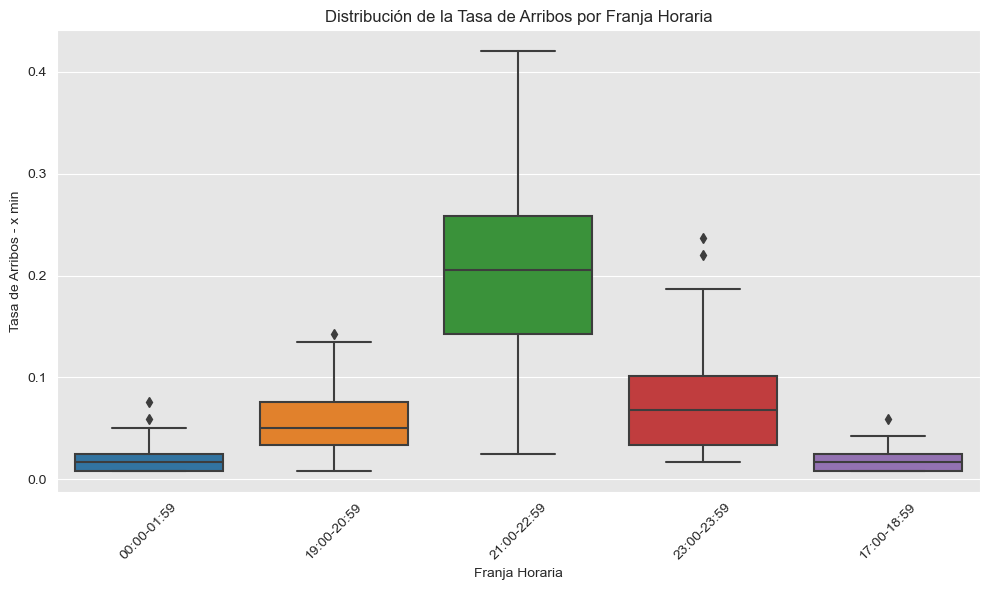

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=tasa_de_arribos, x='Franja_Horaria', y='Tasa_de_Arribos_min')
plt.title('Distribución de la Tasa de Arribos por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Tasa de Arribos - x min')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

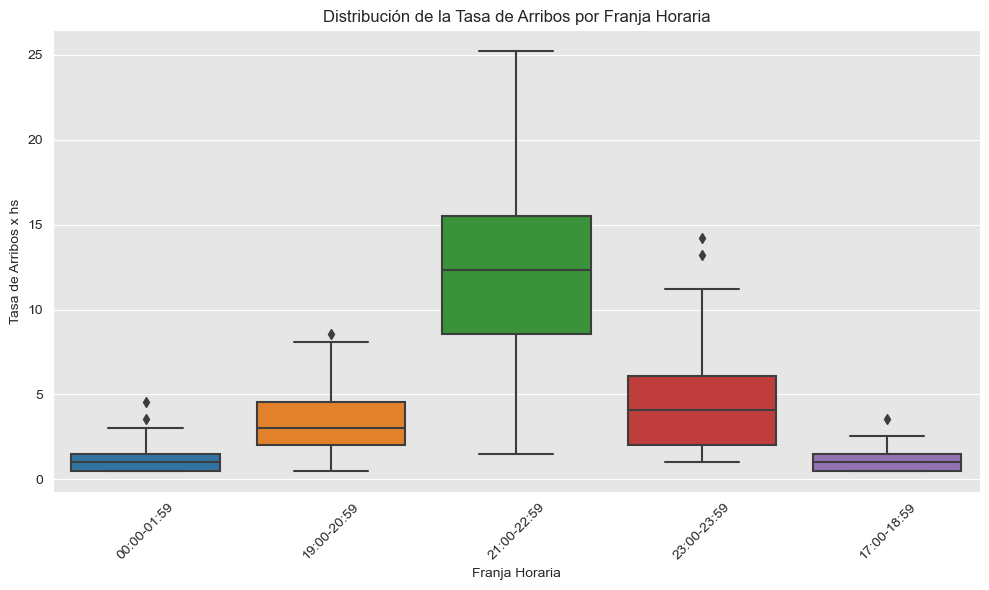

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=tasa_de_arribos, x='Franja_Horaria', y='Tasa_de_Arribos_hs')
plt.title('Distribución de la Tasa de Arribos por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Tasa de Arribos x hs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PARÁMETROS PARA DISTRIBUCIONES TRIANGULARES

## TIEMPOS DE PERMANENCIA

### PARÁMETROS TIEMPO_PERMANENCIA_1

In [61]:
#TIEMPO PERMANENCIA TOTAL
min_total = weekend_night_df["PERM_1"].min()
max_total = weekend_night_df["PERM_1"].max()
moda =  weekend_night_df["PERM_1"].mode()

print("DISTRIB TRIANGULAR PARAMETROS PERMANENCIA 1")
print("\nValor mínimo:", min_total)
print("Valor máxim:", max_total)
print("Valor Moda:", moda)

DISTRIB TRIANGULAR PARAMETROS PERMANENCIA 1

Valor mínimo: 31.000000000000004
Valor máxim: 183.0
Valor Moda: 0    57.0
Name: PERM_1, dtype: float64


### PARÁMETROS TIEMPO_PERMANENCIA_2

In [53]:
#TIEMPO PERMANENCIA 2
min_total = weekend_night_df["PERM_2"].min()
max_total = weekend_night_df["PERM_2"].max()
moda =  weekend_night_df["PERM_2"].mode()

print("DISTRIB TRIANGULAR PARAMETROS PERMANENCIA 2")
print("\nValor mínimo:", min_total)
print("Valor máxim:", max_total)
print("Valor Moda:", moda)

DISTRIB TRIANGULAR PARAMETROS PERMANENCIA 2

Valor mínimo: 0.0
Valor máxim: 60.0
Valor Moda: 0    5.0
Name: PERM_2, dtype: float64


### PARÁMETROS TIEMPO_PERMANENCIA_TOTAL

In [60]:
#TIEMPO PERMANENCIA TOTAL
min_total = weekend_night_df["PERM_TOTAL"].min()
max_total = weekend_night_df["PERM_TOTAL"].max()
moda =  weekend_night_df["PERM_TOTAL"].mode()

print("DISTRIB TRIANGULAR PARAMETROS PERMANENCIA TOTAL")
print("\nValor mínimo:", min_total)
print("Valor máxim:", max_total)
print("Valor Moda:", moda)

DISTRIB TRIANGULAR PARAMETROS PERMANENCIA TOTAL

Valor mínimo: 32.00000000000001
Valor máxim: 222.0
Valor Moda: 0    61.0
Name: PERM_TOTAL, dtype: float64


## TASAS DE ARRIBO

In [52]:
# groupby por franja horaria y calcular el promedio de la tasa de arribos
grouped_tasa_de_arribos = tasa_de_arribos.groupby('Franja_Horaria')['Tasa_de_Arribos_hs'].mean()

print(grouped_tasa_de_arribos)

Franja_Horaria
00:00-01:59     1.176471
17:00-18:59     1.094838
19:00-20:59     3.499753
21:00-22:59    12.550667
23:00-23:59     4.437596
Name: Tasa_de_Arribos_hs, dtype: float64


In [74]:
tasa_de_arribos.head(10)

,FECHA,Franja_Horaria,Num_Arribos,Tasa_de_Arribos_min,Tasa_de_Arribos_hs
0,2023-01-06,00:00-01:59,1,0.008403,0.504202
1,2023-01-06,19:00-20:59,4,0.033613,2.016807
2,2023-01-06,21:00-22:59,9,0.075630,4.537815
3,2023-01-06,23:00-23:59,3,0.050847,3.050847
4,2023-01-07,19:00-20:59,1,0.008403,0.504202
5,2023-01-07,21:00-22:59,44,0.369748,22.184874
6,2023-01-07,23:00-23:59,11,0.186441,11.186441
7,2023-01-08,00:00-01:59,4,0.033613,2.016807
8,2023-01-08,19:00-20:59,6,0.050420,3.025210
9,2023-01-08,21:00-22:59,40,0.336134,20.168067


### LISTADO DE FRANJAS HORARIAS

In [72]:
# Calcular las tasas de arribo por franja horaria
franjas = tasa_de_arribos['Franja_Horaria'].unique()

print(franjas)

['00:00-01:59' '19:00-20:59' '21:00-22:59' '23:00-23:59' '17:00-18:59']


### PARÁMETROS TASA ARRIBO - FRANJA 17 A 19 HS

In [85]:
# Calcular las tasas de arribo por franja horaria
franja1_df = tasa_de_arribos[tasa_de_arribos['Franja_Horaria'] == '17:00-18:59']


#TRIANGULAR - ARRIBOS 17-19
min_total = franja1_df["Tasa_de_Arribos_hs"].min()
max_total = franja1_df["Tasa_de_Arribos_hs"].max()
moda =  franja1_df["Tasa_de_Arribos_hs"].mode()

print("DISTRIB TRIANGULAR PARAMETROS ARRIBOS 17-19 POR HORA")
print("\nValor mínimo:", min_total)
print("Valor máxim:", max_total)
print("Valor Moda:", moda)


DISTRIB TRIANGULAR PARAMETROS ARRIBOS 17-19 POR HORA

Valor mínimo: 0.5042016806722689
Valor máxim: 3.5294117647058822
Valor Moda: 0    0.504202
Name: Tasa_de_Arribos_hs, dtype: float64


### PARÁMETROS TASA ARRIBO - FRANJA 19 A 21 HS

In [84]:
# Calcular las tasas de arribo por franja horaria
franja2_df = tasa_de_arribos[tasa_de_arribos['Franja_Horaria'] == '19:00-20:59']


#TRIANGULAR - ARRIBOS 19-21
min_total = franja2_df["Tasa_de_Arribos_hs"].min()
max_total = franja2_df["Tasa_de_Arribos_hs"].max()
moda =  franja2_df["Tasa_de_Arribos_hs"].mode()

print("DISTRIB TRIANGULAR PARAMETROS ARRIBOS 19-21 POR HORA")
print("\nValor mínimo:", min_total)
print("Valor máxim:", max_total)
print("Valor Moda:", moda)


DISTRIB TRIANGULAR PARAMETROS ARRIBOS 19-21 POR HORA

Valor mínimo: 0.5042016806722689
Valor máxim: 8.571428571428573
Valor Moda: 0    3.02521
Name: Tasa_de_Arribos_hs, dtype: float64


### PARÁMETROS TASA ARRIBO - FRANJA 21 A 23 HS

In [86]:
# Calcular las tasas de arribo por franja horaria
franja3_df = tasa_de_arribos[tasa_de_arribos['Franja_Horaria'] == '21:00-22:59']


#TRIANGULAR - ARRIBOS 21-23
min_total = franja3_df["Tasa_de_Arribos_hs"].min()
max_total = franja3_df["Tasa_de_Arribos_hs"].max()
moda =  franja3_df["Tasa_de_Arribos_hs"].mode()

print("DISTRIB TRIANGULAR PARAMETROS ARRIBOS 21-23 POR HORA")
print("\nValor mínimo:", min_total)
print("Valor máxim:", max_total)
print("Valor Moda:", moda)


DISTRIB TRIANGULAR PARAMETROS ARRIBOS 21-23 POR HORA

Valor mínimo: 1.512605042016807
Valor máxim: 25.210084033613445
Valor Moda: 0    15.12605
Name: Tasa_de_Arribos_hs, dtype: float64


### PARÁMETROS TASA ARRIBO - FRANJA 23 A 02 HS

In [88]:
# Calcular las tasas de arribo por franja horaria
franja4_df = tasa_de_arribos[(tasa_de_arribos['Franja_Horaria'] == '23:00-23:59') | (tasa_de_arribos['Franja_Horaria'] == '00:00-01:59') ]


#TRIANGULAR - ARRIBOS 23-02
min_total = franja4_df["Tasa_de_Arribos_hs"].min()
max_total = franja4_df["Tasa_de_Arribos_hs"].max()
moda =  franja4_df["Tasa_de_Arribos_hs"].mode()

print("DISTRIB TRIANGULAR PARAMETROS ARRIBOS 23HS-02HS POR HORA")
print("\nValor mínimo:", min_total)
print("Valor máxim:", max_total)
print("Valor Moda:", moda)


DISTRIB TRIANGULAR PARAMETROS ARRIBOS 23HS-02HS POR HORA

Valor mínimo: 0.5042016806722689
Valor máxim: 14.23728813559322
Valor Moda: 0    0.504202
Name: Tasa_de_Arribos_hs, dtype: float64
